In [1]:
import os
from xgboost import XGBClassifier
from xgboost import plot_importance
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import xgboost
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge

In [2]:
house_data = pd.read_csv('/Users/munjikahalah/code/munjik/personal-projects/house_prices/train.csv')
testing_data = pd.read_csv('/Users/munjikahalah/code/munjik/personal-projects/house_prices/test.csv')

<h2>Data Cleaning</h2>

In [49]:
house_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [3]:
house_data.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [4]:
testing_data.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [5]:
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
house_data = house_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])

In [7]:
testing_data = testing_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])

<AxesSubplot:>

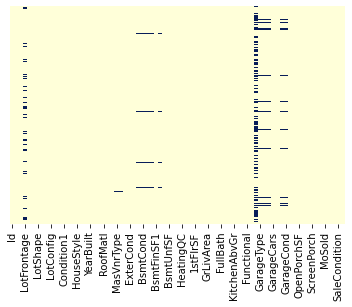

In [8]:
sns.heatmap(house_data.isnull(), yticklabels=False, cbar=False,cmap="YlGnBu")

<AxesSubplot:>

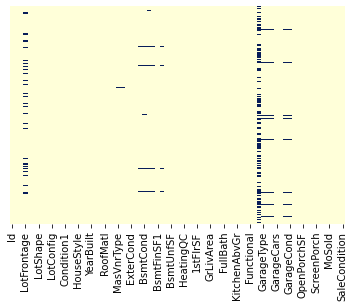

In [9]:
sns.heatmap(testing_data.isnull(), yticklabels=False, cbar=False,cmap="YlGnBu")

In [10]:
house_data = house_data.drop(columns=['BsmtCond'])

In [11]:
testing_data = testing_data.drop(columns=['BsmtCond'])

<h3>💡Suggestion: Greater than 30% of values missing: Potentially drop feature or row
Less than 30% of values missing: impute a value that makes sense e.g. Median, mean, mode. </h3>

In [12]:
house_data = house_data.drop(columns=['LotFrontage'])

In [13]:
testing_data = testing_data.drop(columns=['LotFrontage'])

In [14]:
house_data.isnull().sum().sort_values(ascending=False)#NaN count for each column

FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
MSSubClass        0
SalePrice         0
Length: 75, dtype: int64

In [15]:
testing_data.isnull().sum().sort_values(ascending=False)#NaN count for each column


FireplaceQu      730
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
                ... 
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
SaleCondition      0
Length: 74, dtype: int64

In [16]:
testing_data = testing_data.drop(columns=['KitchenQual' , 'SaleType','BsmtUnfSF','BsmtFinSF1','Exterior2nd', 'Exterior1st', 'GarageCars'])

In [17]:
testing_data = testing_data.drop(columns=['FireplaceQu' , 'GarageYrBlt', 'GarageQual', 'GarageCond'])

In [18]:
testing_data = testing_data.drop(columns=['GarageType', 'GarageFinish','BsmtExposure', 'BsmtFinType1'])

In [19]:
testing_data = testing_data.drop(columns=['BsmtQual', 'BsmtFinType2', 'MasVnrArea', 'MasVnrType','MSZoning'])

In [20]:
testing_data = testing_data.drop(columns=['Functional', 'BsmtFullBath', 'BsmtHalfBath', 'Utilities','BsmtFinSF2'])

In [21]:
# For good practice we'll add these in our code to show future Munji how to deal with these using .replace or imputers
"""
house_data['GarageType'].replace(np.nan, 'NoGarage', inplace=True)
house_data['GarageCond'].replace(np.nan, 'NoGarage', inplace=True)
house_data['GarageFinish'].replace(np.nan, 'NoGarage', inplace=True)
house_data['GarageQual'].replace(np.nan, 'NoGarage', inplace=True)
house_data['BsmtExposure'].replace(np.nan, 'NoBase', inplace=True)
house_data['BsmtFinType2'].replace(np.nan, 'NoBase', inplace=True)
house_data['BsmtQual'].replace(np.nan, 'NoBase', inplace=True)
house_data['BsmtFinType1'].replace(np.nan, 'NoBase', inplace=True)
""" 

""" 
testing_data['GarageType'].replace(np.nan, 'NoGarage', inplace=True)
testing_data['GarageCond'].replace(np.nan, 'NoGarage', inplace=True)
testing_data['GarageFinish'].replace(np.nan, 'NoGarage', inplace=True)
testing_data['GarageQual'].replace(np.nan, 'NoGarage', inplace=True)
testing_data['BsmtExposure'].replace(np.nan, 'NoBase', inplace=True)
testing_data['BsmtFinType2'].replace(np.nan, 'NoBase', inplace=True)
testing_data['BsmtQual'].replace(np.nan, 'NoBase', inplace=True)
testing_data['BsmtFinType1'].replace(np.nan, 'NoBase', inplace=True)
"""

" \ntesting_data['GarageType'].replace(np.nan, 'NoGarage', inplace=True)\ntesting_data['GarageCond'].replace(np.nan, 'NoGarage', inplace=True)\ntesting_data['GarageFinish'].replace(np.nan, 'NoGarage', inplace=True)\ntesting_data['GarageQual'].replace(np.nan, 'NoGarage', inplace=True)\ntesting_data['BsmtExposure'].replace(np.nan, 'NoBase', inplace=True)\ntesting_data['BsmtFinType2'].replace(np.nan, 'NoBase', inplace=True)\ntesting_data['BsmtQual'].replace(np.nan, 'NoBase', inplace=True)\ntesting_data['BsmtFinType1'].replace(np.nan, 'NoBase', inplace=True)\n"

In [22]:
house_data = house_data.drop(columns=['FireplaceQu' , 'GarageYrBlt', 'GarageQual', 'GarageCond'])

In [23]:
house_data = house_data.drop(columns=['GarageType', 'GarageFinish', 'BsmtFinType2','BsmtExposure', 'BsmtQual'])

In [24]:
house_data = house_data.drop(columns=['BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'Electrical'])

In [25]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(testing_data[['GarageArea']])
testing_data['GarageArea'] = imputer.transform(testing_data[['GarageArea']])


In [26]:
imputer.fit(testing_data[['TotalBsmtSF']])
testing_data['TotalBsmtSF'] = imputer.transform(testing_data[['TotalBsmtSF']])


<h2>Data Exploration</h2> <br>
<h3> Check out STD, Plots and Outliers  </h3>

In [27]:
house_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

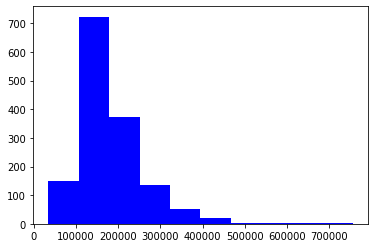

In [28]:
plt.hist(house_data.SalePrice, color='blue')

<AxesSubplot:>

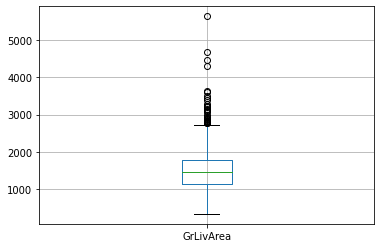

In [29]:
house_data[['GrLivArea']].boxplot()

Text(0.5, 0, 'GrLivArea')

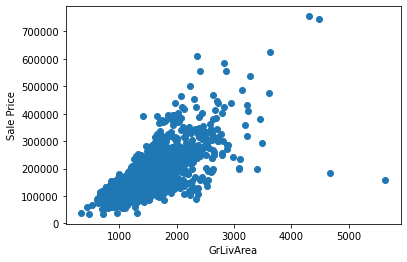

In [30]:
plt.scatter(x=house_data['GrLivArea'], y=house_data['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')

In [31]:
corrmat = house_data.corr()

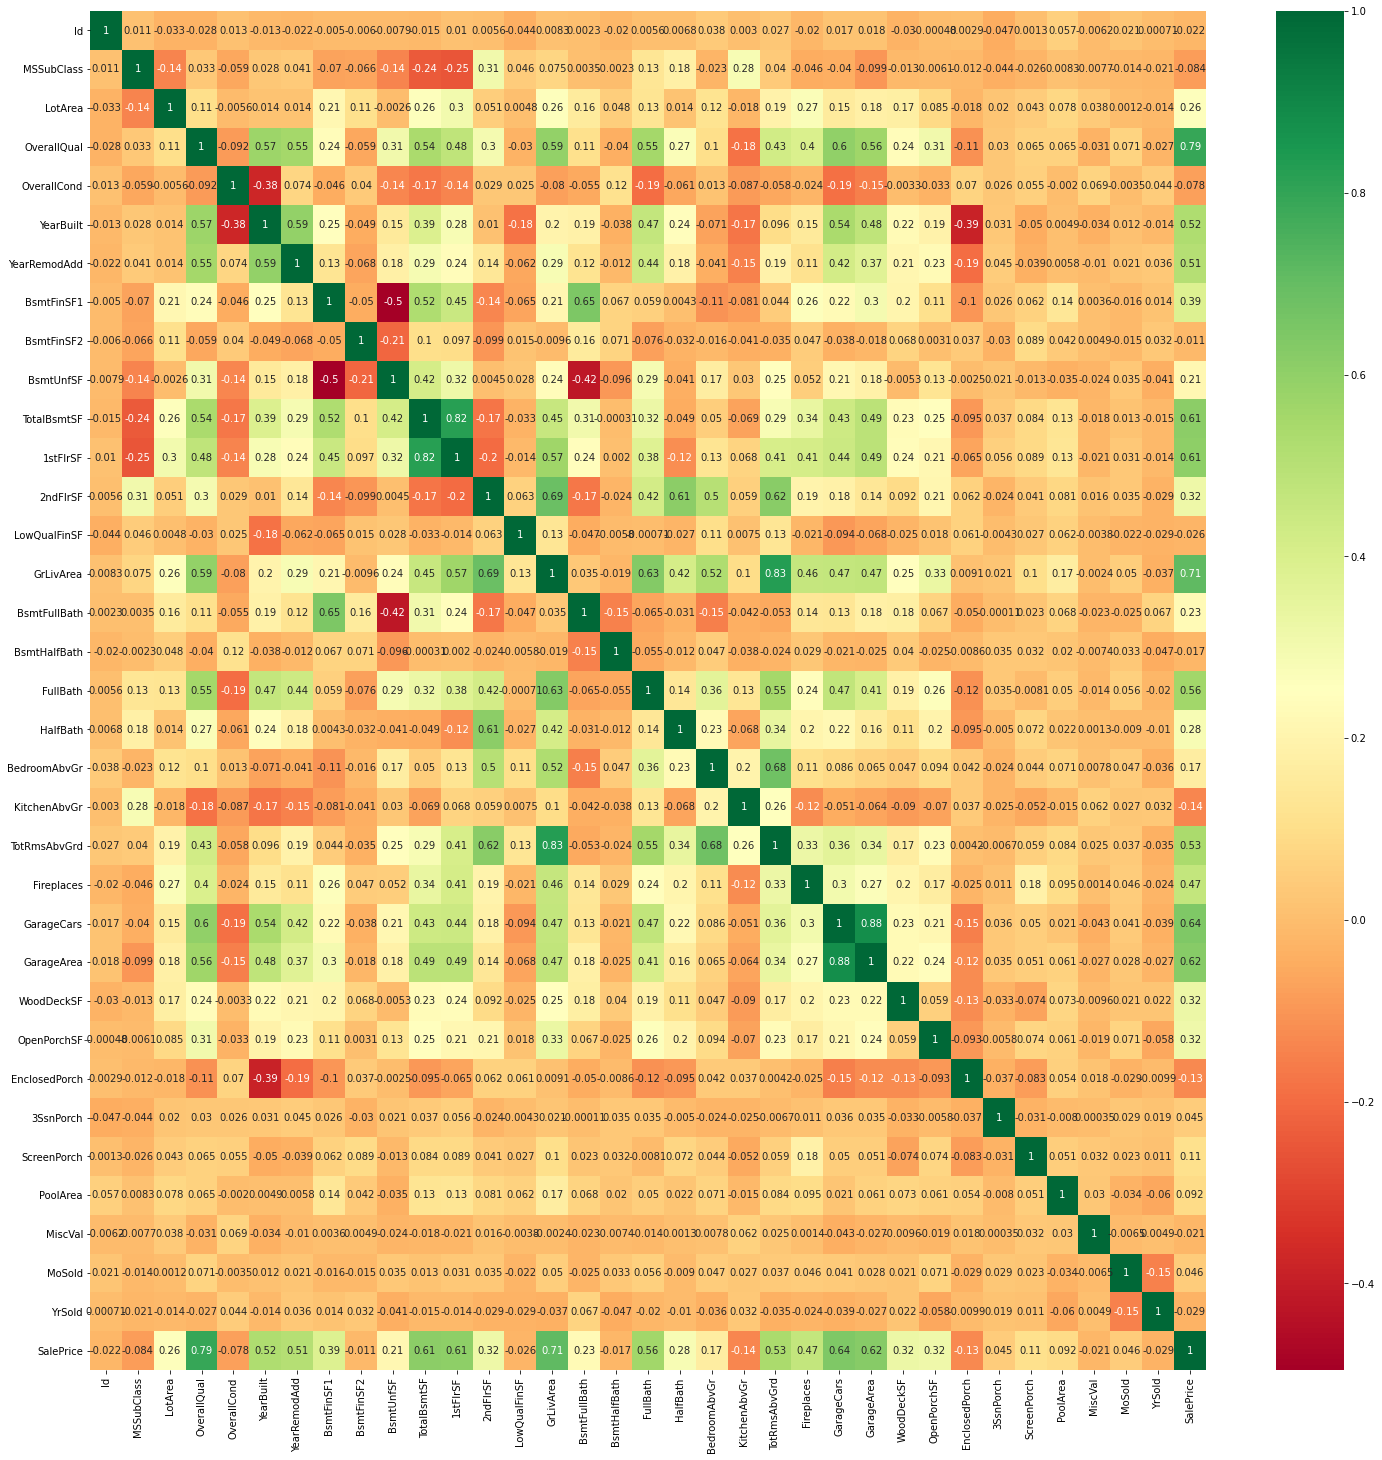

In [32]:
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
g=sns.heatmap(house_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
X = house_data[['OverallQual', 'YearBuilt', 'GrLivArea', 'TotalBsmtSF', 'FullBath','GarageArea']]

In [34]:
y = house_data['SalePrice']

<h2>Building the Model </h2>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
model.score(X_train,y_train)

0.7349693415749646

<h3>We’ll also look at The r-squared value. The r-squared value is a measure of how close the data are to the fitted regression line </h3>

In [39]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8222086518211573


In [40]:
predictions = model.predict(X_test)

In [41]:
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 1269484065.248589


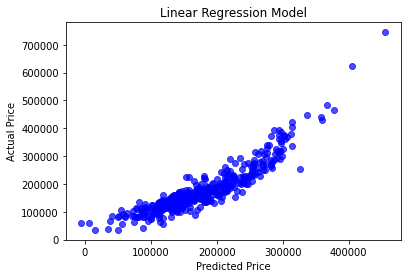

In [42]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [43]:
cv_scores = cross_validate(model, X_train, y_train, cv = 5)
cv_score_mean = np.mean(cv_scores['test_score'])
cv_score_mean

0.7151011585793621

In [44]:
testing_X_data = testing_data[['OverallQual', 'YearBuilt', 'GrLivArea', 'TotalBsmtSF', 'FullBath','GarageArea']]

In [45]:
predictions = model.predict(testing_X_data)

In [46]:
predictions

array([134050.35192393, 163110.52941495, 168538.71196745, ...,
       148767.526243  , 111021.15309193, 236657.17278397])

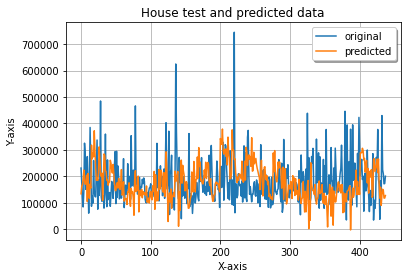

In [47]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions[:438], label="predicted")
plt.title("House test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

NameError: name 'tuned_predict' is not defined

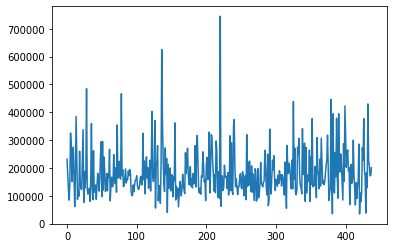

In [48]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, tuned_predict[:438], label="predicted")
plt.title("House test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
output = pd.DataFrame({'Id': testing_data['Id'], 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)

<h2>Let's fine tune and improve our score </h2>

In [ ]:
# # Fit data to Grid Search
# search.fit(X_train,y_train)

<h2> 
4. Grid search
Let's use sklearn GridSearchCV to find the best KNN hyperparameter n_neighbors.
</h2>

Start coarse-grain approach, with n_neighbors = [1,5,10,20,50]
5-fold cross validate each combination
Be sure to maximize your performance time using n_jobs

In [ ]:
rr = Ridge(alpha= 0.01)

In [ ]:
rr.fit(X_train, y_train)

In [ ]:
train_score=model.score(X_train, y_train)
print(train_score)
test_score=model.score(X_test, y_test)
print(test_score)

In [ ]:
Ridge_train_score = rr.score(X_train,y_train)
print(Ridge_train_score)
Ridge_test_score = rr.score(X_test, y_test)
print(Ridge_test_score)

In [ ]:
grid = {'alpha': alpha}

In [ ]:
start_grid = GridSearchCV(rr, grid, cv = 5, n_jobs= -1)
start_grid.fit(X_train,y_train)
# Best score
print(start_grid.best_score_)
# Best Params
print(start_grid.best_params_)
# Best estimator
print(start_grid.best_estimator_)

In [ ]:
tuned_predict = rr.predict(testing_X_data)

In [ ]:
output = pd.DataFrame({'Id': testing_data['Id'], 'SalePrice': tuned_predict})
output.to_csv('tunedpredict.csv', index=False)

In [ ]:
alpha = []
for i in range(-2,3):
    store_alpha = 10**i
    alpha.append(store_alpha)

In [ ]:
# grid = {'alpha' : alpha}
# tuned_model = Ridge()

In [ ]:
# start_grid = GridSearchCV(tuned_model, grid, cv = 5, n_jobs= -1)
# start_grid.fit(X_train,y_train)
# # Best score
# print(start_grid.best_score_)
# # Best Params
# print(start_grid.best_params_)
# # Best estimator
# print(start_grid.best_estimator_)

In [ ]:
# cv_scores_list = []
# k_list = []
# for x in range(1,51):
#     k_list.append(x)
#     cv_scores = cross_validate(KNeighborsRegressor(n_neighbors=x), rescaled_X_train, y_train, cv = 5)
#     cv_score_mean = np.mean(cv_scores['test_score'])
#     cv_scores_list.append(cv_score_mean)

# plt.plot(k_list, cv_scores_list)

In [ ]:
# # Dig deeper with GridSearch
# grid = {'n_neighbors': [5,10,12,14,16,18,20]}
# fine_grain = GridSearchCV(neigh, grid, cv = 5, n_jobs = -1)
# fine_grain.fit(rescaled_X_train,y_train)
# # Best score
# print(fine_grain.best_score_)
# # Best Params
# print(fine_grain.best_params_)
# # Best estimator
# print(fine_grain.best_estimator_)

In [ ]:
# cv_scores_list = []
# k_list = []
# for x in range(1,51):
#     k_list.append(x)
#     cv_scores = cross_validate(KNeighborsRegressor(n_neighbors=x), rescaled_X_train, y_train, cv = 5)
#     cv_score_mean = np.mean(cv_scores['test_score'])
#     cv_scores_list.append(cv_score_mean)

# plt.plot(k_list, cv_scores_list)

In [ ]:
# # Dig deeper with P values now in our grid search
# grid = {'n_neighbors': [1,5,10,20,50], 'p': [1,2,3]}
# # P above us choosing which distance is best way to go about each points.
# search = GridSearchCV(neigh, grid, cv = 5, n_jobs = -1)
# search.fit(rescaled_X_train,y_train)

# # Best score
# print(search.best_score_)
# # Best Params
# print(search.best_params_)
# # Best estimator
# print(search.best_estimator_)

In [ ]:
# model = search.best_estimator_

In [ ]:
# model

In [ ]:
# model.fit(rescaled_X_train, y_train)
# # we found our model above, and need to retrain our rescaled_X with our best model, with .fit for both (Resacled X and regular y_train)
# rescaled_X_test = scaler.transform(X_test)
# # score the model on the Testing data
# model.score(rescaled_X_test, y_test)

In [ ]:
# predictions = model.predict(testing_X_data)

In [ ]:
# output = pd.DataFrame({'Id': testing_data['Id'], 'SalePrice': predictions})
# output.to_csv('submission_second.csv', index=False)